# SME 0243 - Teoria Espectral
Prof. Luis Gustavo Nonato

## Grupo 1: Transformada de Fourier em Grafos
> Ana Cláudia Rodrigues e Silva - 13696241 \
> Andre Guarnier De Mitri - 11395579 \
> Jorge Luiz Franco - 13695091 \
> João Marcos Cardoso da Silva- 11795314


A transformada de Fourier em Grafos é uma extensão das transformadas de Fourier convencionais, que possibilita a interpretação de sinais de grafos.


# Processamento de Sinais em Grafos

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/0*CO1VA5wLh2294qWY.png)

- Add TEXTO

## Sinais em Grafos (Graph Signal)

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*CeErZYwR-N3NlqcB3Yk1UQ.jpeg)

No grafo em exemplo, cada vértice é uma cidade e cada aresta uma estrada que conecta duas cidades. Dessa forma, podemos interpretar o sinal(em vermelho) que sai de cada nó como o número de automóveis em cada cidade.

# Matriz Laplaciana
Qualquer grafo não dirigido pode ser expresso como uma na tupla da forma $G = (V,E,P)$, onde:
- $V$ é um conjunto de vértices
- $E$ é o conjunto de arestas que conectam os vértices 
- $P$ é um conjunto de pesos, não negativos, associados às arestas do grafo

Nesse contexto, podemos definir a matriz laplaciana $L$ associada ao grafo, a qual pode ser definida por:

$
L = D-W
$

Onde $D$ é uma matriz diagonal cujos elementos são a soma dos pesos das arestas conectadas a cada vértice, e $W$ é a matriz de adjacência do grafo, definida a seguir:

$
W_{ij} = \begin{cases}
P_{(i,j)} & \text{se } (i,j) \in E \\
0 & \text{caso contrário}
\end{cases}
$

## Decomposição

Sabemos que a matriz Laplaciana $L$ é simétrica, pois $D$ é diagonal e $W$ possui entradas simétricas para grafos não dirigidos. Por essa razão, é possível aplicar o Teorema Espectral para encontrar uma decomposição de $L$ em autovetores e autovalores, de maneira que os autovetores formam uma base ortonormal para o espaço dos sinais do grafo:
$$
L = U \Lambda U^T
$$
Onde $U$ é uma matriz ortogonal cujas colunas são os autovetores de $L$ e $\Lambda$ é uma matriz diagonal cujos elementos são os autovalores $\lambda_1 \leq \cdots \leq \lambda_n$

Podemos também verificar que $L$ é uma matriz semi-definida positiva (i.e. $\forall i: \lambda_i \geq 0$), pois:

## Tranformada de Fourier
Então, para o sinal do grafo **(g)**, calculamos a **transformada de fourier** como:
$$
\hat g (\lambda_I) = \sum{N}{i=1} g(i)u(i)^{*(I)}
$$

Considerando a I-gésima frequencia $ \lambda_I$, a sua amplitude é dada por  $g(\hat\lambda_I)$

A seguinte expressão é o produto do valor do sinal do grafo no vértice **i** com o valor do **I-ésimo autovetor** no vértice i
$$
g(i)u(i)^{*(I)}
$$

A transformada inversa de Fourier no grafo pode ser definida da seguinte forma:

$$
g(i) = \sum^{N-1}_{I=0} \hat g(\lambda_I)u(i)^{(I)}
$$

Essa transformada inversa representa uma expansão do sinal original do grafo **g** em termos de autovetores e autovalores

## Domínio Espectral do Grafo

Na transformada de Fourier clássica, entendemos intuitivamente que o domínio espectral ou de frequência representa a amplitude de diferentes ondas sinusoidais com frequências variadas que podem ser combinadas para formar a forma de onda original. Precisamos de uma justificativa similar para nos convencermos de que a transformada de Fourier no grafo que definimos acima realmente contém alguma representação no domínio espectral.

Para isso, vamos olhar para os autovetores. Usaremos um grafo de rede de sensores aleatório para facilitar nossa análise. Suponhamos que tenhamos decomposto o sinal original do grafo em $ u_0, u_1, \dots, u_{50} $. O primeiro autovetor $ u_0 $ é sempre constante. O valor desse autovetor é o mesmo para cada vértice no grafo. Isso pode ser considerado como representando o componente DC em sinais clássicos.

![image.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*KFCYqIAhu3cqN-s7Ca0Gyg.png)

As linhas verticais azuis representam o valor do autovetor em cada vértice. Note que este valor é constante para  $u_0$. Em seguida, veremos o autovetor $u_1$, que é o seguinte:

![image.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*9mrMCLj9DS3RFxX3Wd6f5g.png)

As linhas pretas representam valores negativos e as linhas azuis representam valores positivos. 
Podemos pensar na frequência como o número de arestas no grafo onde o vértice em uma extremidade tem um valor positivo e o vértice na outra extremidade tem um valor negativo. Podemos definir isso formalmente da seguinte maneira:

$$
\mathcal{Z}_{\mathcal{G}}(\boldsymbol{g})=\{e=(i, j) \in \mathcal{E}: g(i) g(j)<0\}
$$
Vamos chamar isso de mudança de sinal. Portanto, o número de mudanças de sinal em um autovetor pode ser considerado como uma representação da frequência do autovetor.

Então para $u_{50}$ teriamos:

![image.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*qIRBziRcuEP-63qI7y0KVQ.png)

Podemos ver que $u_{50}$ tem muito mais mudanças de sinal do que $u_{1}$.

- Adicionar TEORIA falando da compressão

# Aplicação em dados reais

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
df_pox = pd.read_csv('data/hungary_chickenpox.csv')
df_pox.head(3)

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44


In [3]:
df_edges = pd.read_csv('data/hungary_county_edges.csv')
df_edges.head(2)

,name_1,name_2,id_1,id_2
0,BACS,JASZ,0,10
1,BACS,BACS,0,0


In [4]:
import networkx as nx
import pickle

def save_graphs_to_files(df_pox, df_edges):
    """
    Constrói grafos a partir de dados de infectados por cidade e salva cada grafo em formato GraphML.

    Args:
    - df_pox (DataFrame): DataFrame contendo dados de infectados por cidade e data.
    - df_edges (DataFrame): DataFrame contendo informações de arestas entre cidades.

    Salva:
    - Arquivos GraphML individuais para cada data, nomeados 'graph_data.graphml'.
    - Um arquivo pickle 'graph_list.pickle' contendo uma lista de todos os grafos construídos.
    """
    all_graphs = []
    
    for date in df_pox['Date'].unique():
        df_current_date = df_pox[df_pox['Date'] == date]
        G = nx.Graph()
        
        # Adicionar nós (cidades) com suas features (valor de infectados)
        for index, row in df_current_date.iterrows():
            city = index  
            for col in df_pox.columns[1:]: # Não usar a coluna date aqui
                signal_value = row[col]
                G.add_node(col, signal=signal_value)
        
        # Conexão entre cidades (arestas)
        for index, row in df_edges.iterrows():
            name_1 = row['name_1']
            name_2 = row['name_2']
            G.add_edge(name_1, name_2)
        
        # Salvar o grafo em formato GraphML
        converted_date = date.replace('/', '_')
        nx.write_graphml(G, f"grafos/graph_{converted_date}.graphml")
        all_graphs.append(G)
    
    # Salvar a lista de grafos em um arquivo pickle
    with open("grafos/graph_list.pickle", "wb") as f:
        pickle.dump(all_graphs, f)


save_graphs_to_files(df_pox, df_edges)

In [5]:
def get_graph_by_date(date):
    """
    Recupera o grafo correspondente a uma determinada data de um arquivo GraphML.
    
    Parâmetros:
    - date (str): String de data no formato usado nos nomes de arquivo de grafo.
    
    Retorna:
    - nx.Graph: Objeto de grafo correspondente à data fornecida.
    
    Lança:
    - FileNotFoundError: Se o arquivo GraphML para a data fornecida não existir.
    """
    converted_date = date.replace('/', '_')
    graph_filename = f"grafos/graph_{converted_date}.graphml"
    
    if not os.path.exists(graph_filename):
        raise FileNotFoundError(f"Arquivo GraphML não encontrado para a data: {date}")
    
    G = nx.read_graphml(graph_filename)
    return G

# Exemplo:
date_to_retrieve = '01/01/2007'
graph_for_date = get_graph_by_date(date_to_retrieve)
type(graph_for_date)

networkx.classes.graph.Graph

In [6]:
def get_existing_graph_names(directory="grafos"):
    """
    Recupera todos os nomes de arquivos GraphML existentes no diretório especificado.
    
    Parâmetros:
    - directory (str): Caminho do diretório onde os arquivos GraphML estão armazenados.
                      O padrão é "grafos".
    
    Retorna:
    - list: Lista de nomes de arquivos GraphML existentes (sem o caminho do diretório).
    """
    graphml_files = []
    
    # Lista todos os arquivos no diretório especificado
    files = os.listdir(directory)
    
    # Filtra os arquivos com base na convenção de nome de arquivo GraphML
    for file in files:
        if file.startswith("graph_") and file.endswith(".graphml"):
            graphml_files.append(file)
    
    return graphml_files

# Exemplo
existing_graphs = get_existing_graph_names()
for graph_file in existing_graphs[:3]:
    print(graph_file)

graph_01_01_2007.graphml
graph_01_02_2010.graphml
graph_01_03_2010.graphml


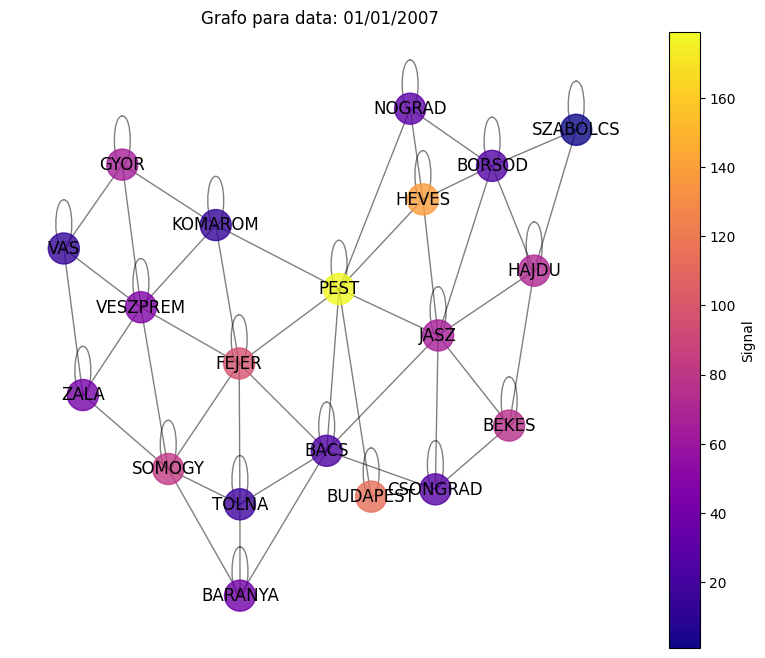

In [7]:
def plot_graph_by_date(date):
    """
    Plota o grafo correspondente a uma determinada data com configurações personalizadas.
    
    Parâmetros:
    - date (str): String de data no formato usado nos nomes de arquivo de grafo.
    
    Exibe:
    - Plot do grafo correspondente à data fornecida com cores baseadas nos valores de sinal dos nós.
    
    Lança:
    - FileNotFoundError: Se o arquivo GraphML para a data fornecida não existir.
    """
    try:
        G = get_graph_by_date(date)
    except FileNotFoundError as e:
        print(e)
        return
    
    plt.figure(figsize=(10, 8))  # Tamanho da figura
    
    pos = nx.spring_layout(G)  # Layout do grafo
    
    signal_values = [G.nodes[city]['signal'] for city in G.nodes()]  # Coletando os valores de sinal dos nós para coloração
    norm = plt.Normalize(min(signal_values), max(signal_values)) # Normalização e mapa de cores
    cmap = plt.cm.plasma
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=signal_values, cmap=cmap, alpha=0.8)  # Desenhar nós
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5) # Desenhar arestas
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif') # Desenhar rótulos dos nós (nomes das cidades)
    
    # Configuração da barra de cores
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=plt.gca(), label='Signal')
    # cbar.ax.invert_yaxis()  # Opcional: inverter a barra de cores se necessário
    
    plt.title(f'Grafo para data: {date}')  # Título
    plt.axis('off')
    plt.show()  # Exibir o gráfico
    
plot_graph_by_date('01/01/2007')